# First-order Ordinary Differential Equations (ODEs)

## Lecture 2

In class, we looked at a cooling problem.  Using a physical principle, we could model this problem as a differential equation.  The equation we have dealt with is classified as the first order ordinary differential equations (ODEs).  In the first part of this course, we will investigate the various types of the first order ODEs and their solution methods.

### A general form of the first-order ODEs
A general form of the first-order ODEs can be written as
\begin{equation} \label{eq:1ode}\tag{1}
y' := \frac{dy}{dt} = f(t,y)
\end{equation}
where $f$ is a function of two variables $t$ and $y$.  It is called __first-order__ because the highest derivative shown in the above equation is 1st-order, not higher orders like $ y '' $   or $ y ''' $. (We will deal with higher-order ODEs in the later part of this course.)  The term __ordinary differential__ means that $y$  is a function of one variable only, in this case time $t$; if we consider changes of $y$ at many different places in addition to time, we would use $y(t,x)$ instead of $ y(t) $ and the rate of change in time at a given time $t$ and location $x$ is written as $ \frac{ \partial y }{ \partial t } $.  The equations with this partial derivative are called __partial differential equations (PDEs)__.  We will study PDEs in the next semester.

Other terms of interest are independent and dependent variables.  Since we are interested in how $y$  changes as $t$ changes, $y$ is called a dependent variable while $t$ is called an independent one.  Depending on authors or problems, many different symbols are used for independent and dependent variables.  We have been using $t$ as an independent variable because the dependent variable $y$ changes in time.  If it varies over a space, we would better use $x$ instead of $t$.  In this case, the general form can be written as $ y' = f(x,y) $.  To make you confuse further, we may write the same differential equation as $ x' = f(t,x) $. (Guess what is independent variable.)

**Example**

In the cooling equation we considered in class,

\begin{equation}
T' = k(T_e - T)
\end{equation}

the right hand side is a function of a dependent variable $T$ only because $ T_e $ was assumed to be a constant.  In this case, the general form can be given as $ y' = f(y) $ which is called __autonomous__ equation.  If we consider a variation of the external temperature, for example $ T_e(t) = k \sin t $, then the cooling equation becomes $ T'  = k(\sin t -T )$ and the right hand side is a function of $t$ and $T$, which is the same form of \eqref{eq:1ode}.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Geometric Approach: Drawing a slope field

**Example 1.** Draw the slope field of the following equation.

$$ \frac{dx}{dt} = - \frac{t}{x} $$

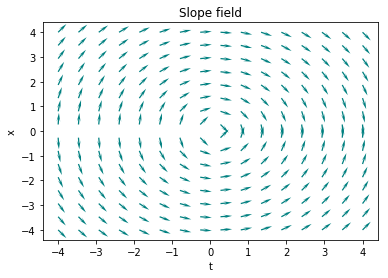

In [2]:
t, x = np.mgrid[-4:4:16j, -4:4:16j] # create a grid on tx-plane
U = 1                               # calcuate a slope
V = -t/x

speed = np.sqrt(U**2 + V**2)        # calculate the size of a slope
UN = U/speed                        # normalize the size of a slope
VN = V/speed

plot1 = plt.figure()                
plt.quiver(t, x, UN, VN,            # plot slopes at grid points
           color='Teal', 
           headlength=7)

plt.title('Slope field')
plt.xlabel('t')
plt.ylabel('x')
plt.show(plot1)

**Example 2.** Draw a slope field of the following differential equation 

\begin{equation}
x' = \sin x.
\end{equation}

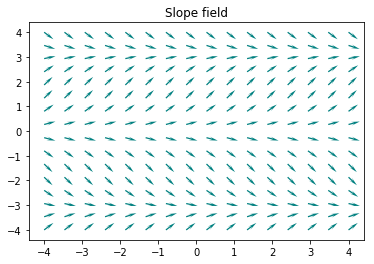

In [6]:
t, x = np.mgrid[-4:4:16j, -4:4:16j] # create a grid on tx-plane
U = 1                               # calcuate a slope
V = np.sin(x)

speed = np.sqrt(U**2 + V**2)        # calculate the size of a slope
UN = U/speed                        # normalize the size of a slope
VN = V/speed

plot1 = plt.figure()                
plt.quiver(t, x, UN, VN,            # plot slopes at grid points
           color='Teal', 
           headlength=7)

plt.title('Slope field')
plt.show(plot1)

**Exercies 1.** Draw the slope field of the following equation.

$$ \frac{dy}{dt} = 1 + t - y $$

In [ ]:
t, y = np.mgrid[-4:4:16j, -4:4:16j]
# Your code here
U = 1
V = 
##################

speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

plot1 = plt.figure()
plt.quiver(t, y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Slope field')
plt.show(plot1)

**Exercies 2.** Draw the slope field of the following equation.

$$ y' = x^2 + y^2 -1 $$

In [ ]:
x, y = np.mgrid[-3:3:16j, -3:3:16j]
# Your code here
U = 1
V = 
###################

speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

plot1 = plt.figure()
plt.quiver(t, y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Slope field')
plt.show(plot1)

**Exercies 3.** Draw the slope field of the following equation.

$$ t\frac{dy}{dt} + 2y = 4t^2 $$

In [ ]:
t, y = np.mgrid[-3:3:16j, -1:6:16j]
# Your code here
U = 1
V = 
##################

speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

plot1 = plt.figure()
plt.quiver(t, y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Slope field')
plt.show(plot1)

### Numerical Approach: Euler Method

In [1]:
def forwardEuler(f,t0,dt,tf,y0):
    """ forwardEuler uses the Euler algorithm to integrate the differntial 
    equation for a 1d problem

    t0 is the starting time
    dt is the timestep
    tf is the ending time
    y0 is the initial state of y
    
    This routine returns a tuple of the form (t, y)
    where t is a list of all of the times from t0 to tf
    in steps of dt """
    t = []
    y = []
    t.append(t0)
    y.append(y0)
    n = int((tf - t0)/dt) 
    
    for i in range(n):
        ytemp = y[i] + f(t[i],y[i])*dt
        ttemp = t[i] + dt

        y.append(ytemp)
        t.append(ttemp)
    return np.array(t), np.array(y)

##### Example 1

$$ \frac{dy}{dt} = y + t $$

In [2]:
# define a function
def f(t,y):
    return y + t

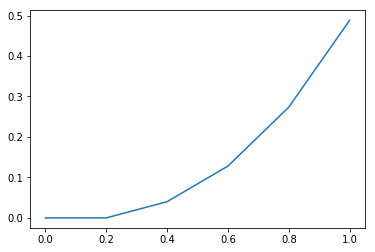

In [8]:
t, y = forwardEuler(f,0,0.2,1,0)

#print(y)

plot = plt.figure()
plt.plot(t,y)
plt.show(plot)

##### Exercise 1

$$ y' = 1 + t - y $$

In [ ]:
# define a function
def f2(t,y):
    return 

In [ ]:
t, y = forwardEuler(f2,0.1,0.1,1,1)

plot0 = plt.figure()
plt.plot(t,y)
plt.show(plot0)

##### Exercise 2

$$ t\frac{dy}{dt} + 2y = 4t^2 $$

In [4]:
# define a function
def f2(t,y):
    return 

In [9]:
t, y = forwardEuler(f2,0.1,0.1,1,1)

plot1 = plt.figure()
plt.plot(t,y)
plt.show(plot1)

NameError: name 'f2' is not defined

##### Exercise 2: Draw integral curves with a slope field

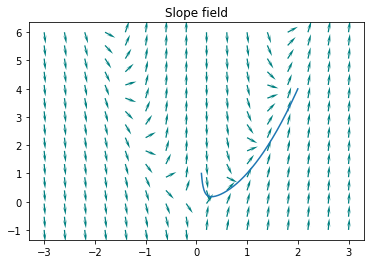

In [8]:
# slope field
t, y = np.mgrid[-3:3:16j, -1:6:16j]

U = 1
V = 
speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

# Euler method
nt1, ny1 = forwardEuler(f2,0.1,0.01,2,1)

plot1 = plt.figure()

# plot slope field
plt.quiver(t, y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Slope field')

# plot integral curve
plt.plot(nt1,ny1)

# plot together
plt.show(plot1)